In [ ]:
!pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 41.6 MB/s eta 0:00:00


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 35.1 MB/s eta 0:00:00


In [ ]:
!pip uninstall cython
!pip install cython
!pip uninstall cartopy
!pip install cartopy

Found existing installation: Cython 0.29.33
Uninstalling Cython-0.29.33:
  Would remove:
    /usr/local/bin/cygdb
    /usr/local/bin/cython
    /usr/local/bin/cythonize
    /usr/local/lib/python3.9/dist-packages/Cython-0.29.33.dist-info/*
    /usr/local/lib/python3.9/dist-packages/Cython/*
    /usr/local/lib/python3.9/dist-packages/cython.py
    /usr/local/lib/python3.9/dist-packages/pyximport/*
Proceed (Y/n)? y
  Successfully uninstalled Cython-0.29.33
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 82.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.

In [ ]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

E: Unable to locate package python-cartopy
Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.5/275.5 KB 9.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.0.1-cp39-cp39-linux_x86_64.whl size=979744 sha256=aba3a34c37a20fbd73544baebcae27fb032f063e36f45d3f2ce302079010c18b
  Stored in directory: /root/.cache/pip/wheels/c2/f0/2b/e33fb469c9bf8d08688be4df902af6d7c2210128fc7c046889
Successfully built shapely


In [ ]:
import pandas as pd
import pyproj
import math
import matplotlib.pyplot as plt
import seaborn as sb
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon
import time

In [ ]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
#ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df1 = pd.read_csv(ruta)
df1

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [ ]:
#Creación de la proyección
P1 = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [ ]:
#Se convertirán las coordenadas geográficas a UTM
df1['x'], df1['y'] = P1(df1['longitud'], df1['latitud'])
df1

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,710198.574916,780930.648555


In [ ]:
latitudMax=max(df1['latitud'])
latitudMin=min(df1['latitud'])
longitudMax=max(df1['longitud'])
longitudMin=min(df1['longitud'])

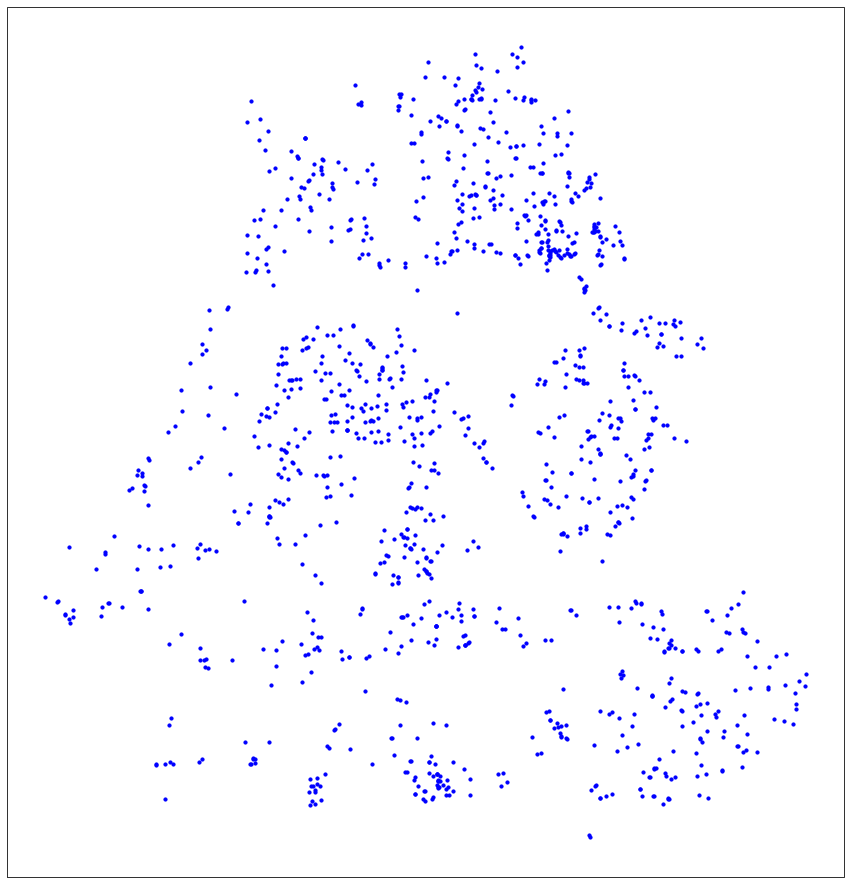

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Puntos Melbourne
#lower_lon = longitudMin
#upper_lon = longitudMax
#lower_lat = latitudMin
#upper_lat = latitudMax
lower_lon = -73.13
upper_lon = -73.08
lower_lat = 7.06
upper_lat = 7.10

ax.scatter(df1['longitud'], df1['latitud'], zorder=10, c='b', s=10)
plt.show()

In [ ]:
#Se carga la cartografía de Melbourne
url = 'https://foscal.net/cartografia/'
#url = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.qmd", "68276_urbano.shp", "68276_urbano.shx"]
#file_list = ["melbourne-metro-region.dbf", "melbourne-metro-region.prj", "melbourne-metro-region.shp", "melbourne-metro-region.shx"]
#file_list = ["UrbanExtent2015_region.dbf", "UrbanExtent2015_region.prj", "UrbanExtent2015_region.shp", "UrbanExtent2015_region.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

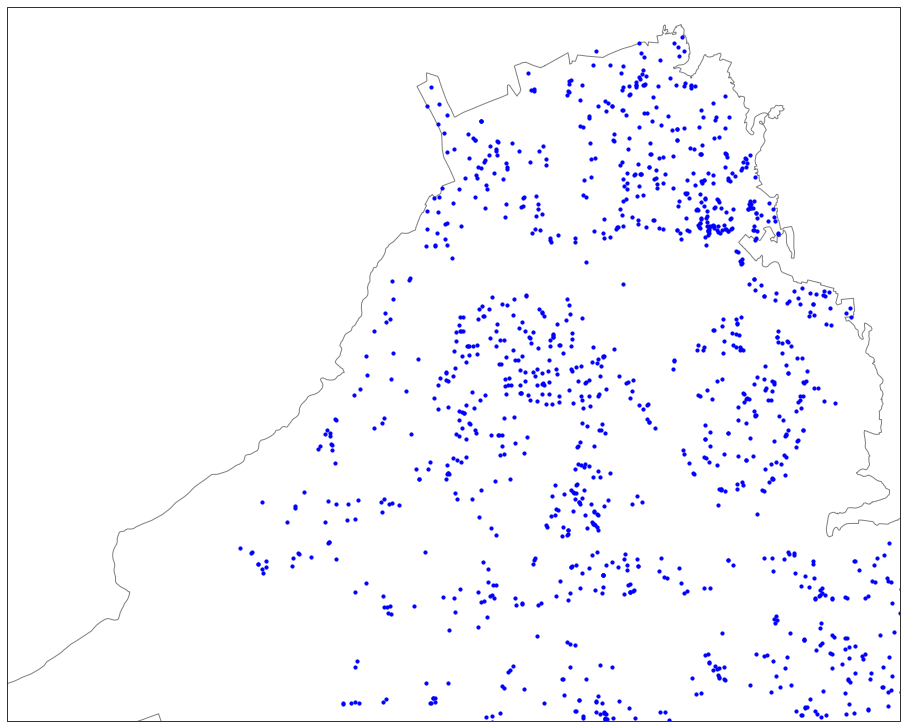

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Puntos y mapa de Melbourne
#lower_lon = longitudMin
#upper_lon = longitudMax
#lower_lat = latitudMin
#upper_lat = latitudMax

lower_lon = -73.13
upper_lon = -73.08
lower_lat = 7.06
upper_lat = 7.10

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df1['longitud'], df1['latitud'], zorder=10, c='b', s=10)

plt.show()

In [ ]:
floridablanca=gpd.read_file('68276_urbano.shp')
floridablanca=floridablanca.to_crs(epsg=32618)
area=floridablanca.geometry.area[0]
total_puntos=len(df1)
print("Area:{}, total puntos:{}".format(area,total_puntos))

Area:17030066.989459652, total puntos:1262


In [ ]:
def calcularDistancia(x,y,x1,y1):
  distancia=math.sqrt((x1-x)**2+(y1-y)**2)
  return distancia

In [ ]:
listaPuntos = []
for i in range(df1.shape[0]):
  listaPuntos.append((df1['x'][i], df1['y'][i]))

In [ ]:
def funcionk(listaPuntos, area, h):
  contK=0
  for i in range(len(listaPuntos)-1):
    for j in range(i+1,len(listaPuntos)):
      if calcularDistancia(listaPuntos[i][0],listaPuntos[i][1],listaPuntos[j][0],listaPuntos[j][1])<=h:
        contK+=1
  valorK=contK*area/len(listaPuntos)**2
  return valorK

In [ ]:
funcionk(listaPuntos,area,100)

42536.56591433522

In [ ]:
#Se obtienen las  coordenadas limite para generar aleatorios en UTM
x_min, y_min = P1(lower_lon, lower_lat)
x_max, y_max = P1(upper_lon, upper_lat)
x_min, y_min, x_max, y_max


(706552.7316262802, 780796.0652021945, 712059.2439258386, 785242.8333012793)

In [120]:
from shapely.geometry import shape
import random

poligono = gpd.read_file('68276_urbano.shp') 
poligono_shapely = shape(poligono.geometry.iloc[0])

def generar_puntos_aleatorios(num_puntos, poligono_shapely):
    puntos = []
    coordenadas=[]
    while len(puntos) < num_puntos:
      
      x=random.uniform(poligono_shapely.bounds[0], poligono_shapely.bounds[2])
      y=random.uniform(poligono_shapely.bounds[1], poligono_shapely.bounds[3])
      punto = Point(x,y)         
      if punto.within(poligono_shapely):
          puntos.append(punto)
          coordenadas.append(P1(x,y))
    return puntos,coordenadas
puntos_totales = []
coordenadas_totales=[]
for i in range(9):
    puntos_grupo,coordenadas_grupo = generar_puntos_aleatorios(1262, poligono_shapely)
    puntos_totales.append(puntos_grupo)
    coordenadas_totales.append(coordenadas_grupo)

In [122]:
df_pruebaGrupo = pd.DataFrame(coordenadas_totales[0], columns=['x','y'])

df_pruebaGrupo['longitud'],df_pruebaGrupo['latitud']=P1(df_pruebaGrupo['x'],df_pruebaGrupo['y'],inverse=True)


df_pruebaGrupo

,x,y,longitud,latitud
0,710027.453033,780874.100583,-73.098551,7.060578
1,707386.346529,780838.842279,-73.122454,7.060356
2,711265.544069,783522.105081,-73.087248,7.084473
3,711720.411888,782331.465438,-73.083175,7.073691
4,710101.297691,783238.009229,-73.097795,7.081948
...,...,...,...,...
1257,708184.012716,782313.240794,-73.115181,7.073657
1258,712191.421221,780206.771943,-73.078992,7.054465
1259,709787.893494,784804.289765,-73.100573,7.096120
1260,710224.973278,783500.034543,-73.096666,7.084312


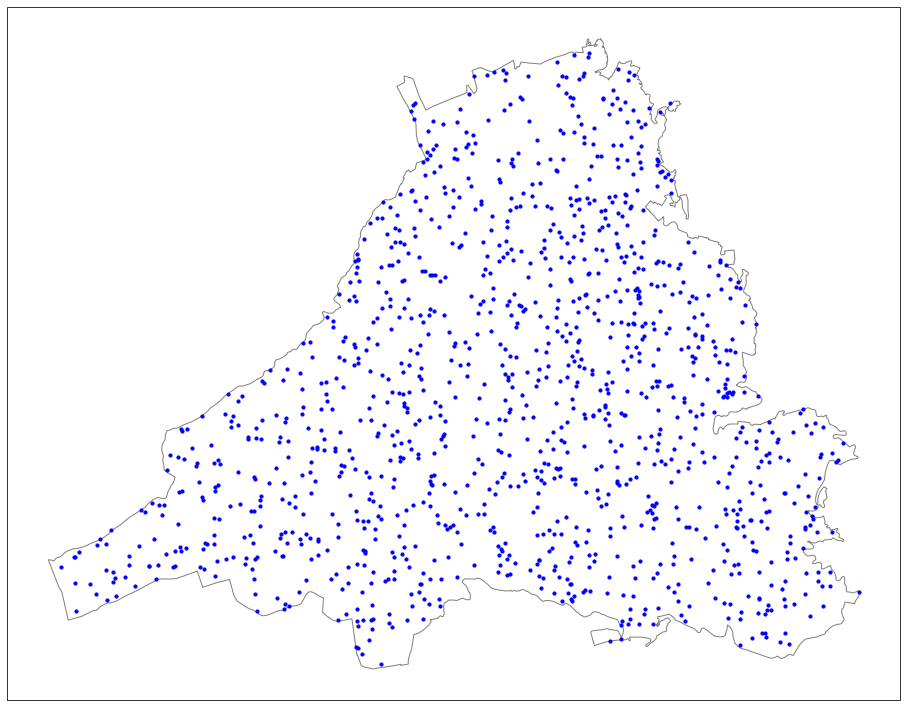

In [117]:
puntos_totales_gdf = gpd.GeoDataFrame(geometry=puntos_grupo)

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)
poligono.plot(ax=ax, facecolor='white', edgecolor='gray')
puntos_totales_gdf.plot(ax=ax, markersize=10, color='blue')
plt.show()

In [ ]:
listaPuntos_totales = []
for i in range(df_pruebaGrupo.shape[0]):
  listaPuntos_totales.append((df_pruebaGrupo['x'],df_pruebaGrupo['y']))

In [152]:
lista=[]
grupos=[]
for h in range(10,201,10):
    k = funcionk(listaPuntos,area,h)
    listak=[]
    for group in coordenadas_totales:
        listak.append(funcionk(group,area,h))
    grupos.append(listak)
    listak.append(k)
    listak.sort()

    percentile_2_5 = np.percentile(listak, 2.5)
    percentile_97_5 = np.percentile(listak, 97.5)
    lista.append([h, k,percentile_2_5, percentile_97_5])
    

In [153]:
# Create a data frame to display the k values for each group
group_columns = ['Grupo {}'.format(i+1) for i in range(len(coordenadas_totales))]
group_columns.append('Grupo Reales')
print(group_columns)

['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5', 'Grupo 6', 'Grupo 7', 'Grupo 8', 'Grupo 9', 'Grupo Real']


In [157]:
dfgrupos=pd.DataFrame(grupos, columns=group_columns)
indices = [f'K{i}' for i in range(10, 201,10)]
dfgrupos = dfgrupos.set_index(pd.Index(indices))
dfgrupos

,Grupo 1,Grupo 2,Grupo 3,Grupo 4,Grupo 5,Grupo 6,Grupo 7,Grupo 8,Grupo 9,Grupo Real
K10,53.464764,117.622480,160.394291,160.394291,171.087243,192.473149,192.473149,192.473149,203.166102,2127.897591
K20,556.033541,556.033541,577.419447,577.419447,588.112400,620.191258,705.734879,727.120785,801.971454,4362.724709
K30,1186.917752,1240.382515,1261.768421,1293.847279,1293.847279,1475.627475,1507.706333,1507.706333,1529.092239,6950.419267
K40,2277.598929,2341.756645,2373.835504,2416.607314,2448.686173,2491.457983,2566.308652,2577.001605,2758.781801,10340.085279
K50,3582.139161,3721.147546,3785.305262,3828.077073,3892.234790,3945.699553,4106.093844,4170.251560,4180.944513,14692.117035
K60,5154.003210,5186.082068,5282.318643,5645.879035,5710.036752,5763.501515,5806.273326,5827.659232,5849.045137,19407.709184
K70,7132.199463,7207.050132,7228.436038,7474.373950,7538.531667,7656.154146,7773.776626,7805.855485,7880.706154,24861.115071
K80,9292.175912,9302.868865,9473.956109,9612.964494,9805.437643,9965.831934,9997.910792,10083.454414,10190.383941,30474.915248
K90,11847.791612,11944.028187,12018.878856,12061.650667,12414.518106,12435.904012,12606.991255,12671.148971,12831.543262,36163.566094
K100,14478.257981,14820.432468,14863.204279,15119.835144,15312.308293,15483.395536,15579.632111,15879.034787,15911.113645,42536.565914


In [159]:
dfpercentil=pd.DataFrame(lista,columns=('h','k','percentile_2_5', 'percentile_97_5'))
dfpercentil = dfpercentil.set_index(pd.Index(indices))
dfpercentil

,h,k,percentile_2_5,percentile_97_5
K10,10,2127.897591,67.900250,1694.833006
K20,20,4362.724709,556.033541,3561.555227
K30,30,6950.419267,1198.947324,5730.620686
K40,40,10340.085279,2292.034415,8634.291996
K50,50,14692.117035,3613.416047,12327.103218
K60,60,19407.709184,5161.220953,16357.009774
K70,70,24861.115071,7149.040864,21040.523064
K80,80,30474.915248,9294.581827,25910.895704
K90,90,36163.566094,11869.444841,30913.860957
K100,100,42536.565914,14555.247240,36545.839154


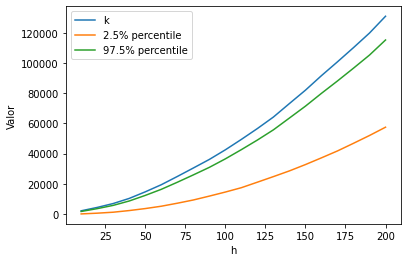

In [160]:
dfinal = pd.DataFrame(lista, columns=['h', 'k', 'percentile_2_5', 'percentile_97_5'])

# Creamos la visualización
plt.plot(dfinal['h'], dfinal['k'], label='k')
plt.plot(dfinal['h'], dfinal['percentile_2_5'], label='2.5% percentile')
plt.plot(dfinal['h'], dfinal['percentile_97_5'], label='97.5% percentile')
plt.xlabel('h')
plt.ylabel('Valor')
plt.legend()
plt.show()